# Visualizing optimized factor results to compare runs

In [37]:
import scanpy as sc
import csv
from scipy.optimize import linear_sum_assignment

# going to start with just comparing two runs
factors_1 = []
factors_2 = []

# reading in factors from csv

with open('factors_0.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    # get list of factors from csv
    factors_1 = list(csv_reader)

    csv_file.close()

with open('factors_1.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    factors_2 = list(csv_reader)

    csv_file.close()

    
row_ind_1, col_ind_1 = linear_sum_assignment(factors_1)
row_ind_2, col_ind_2 = linear_sum_assignment(factors_2)


In [3]:
optimized_factors_1 = []
for r in row_ind_1:
    row = []
    for c in col_ind_1:
        row.append(float(factors_1[r][c]))
    optimized_factors_1.append(row)




In [4]:
optimized_factors_2 = []
for r in row_ind_2:
    row = []
    for c in col_ind_2:
        row.append(float(factors_2[r][c]))
    optimized_factors_2.append(row)


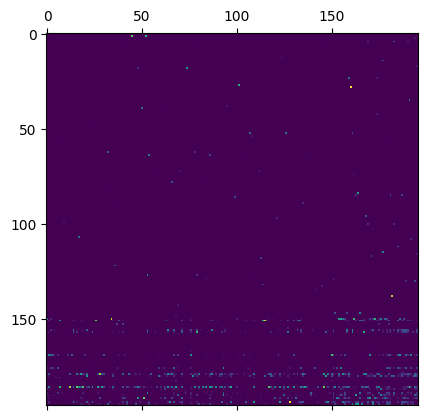

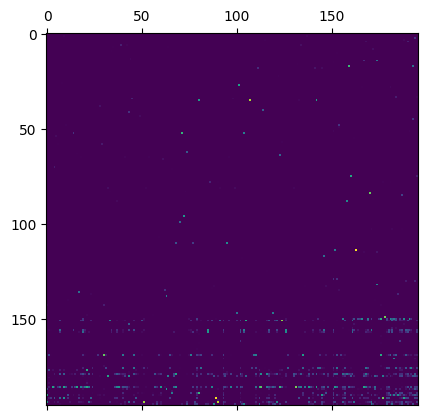

In [5]:
import matplotlib.pyplot as plt
# print(type(optimized_factors[0][0]))

plt.matshow(optimized_factors_1)

plt.matshow(optimized_factors_2)



Graph feels like it isn't super helpful - we mostly want an easy way to check
that it's returning mostly the same factors

Next thing to do:
- get the list of returned genes for each factor
- use sets to figure out how much intersection there is
- assuming high intersection means it's good

In [18]:
factor_names_1 = []
factor_names_2 = []
factor_names_3 = []

with open('markers_0.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    # get list of factors from csv
    factor_names_1 = list(csv_reader)

    csv_file.close()

with open('markers_1.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    factor_names_2 = list(csv_reader)

    csv_file.close()

with open('markers_2.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    factor_names_3 = list(csv_reader)

    csv_file.close()


In [85]:

intersection_score = 0
total_factors = 25 * 193
best_scores = []
print("Total number of genes: " + str(total_factors))

for r in range(len(factor_names_1)):
    row1 = set(factor_names_1[r])
    best = 0
    for c in range(len(factor_names_1)):
        row2 = set(factor_names_2[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best
    best_scores.append(best)

print("Comparing runs 1 and 2: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

intersection_score = 0

for r in range(len(factor_names_1)):
    row1 = set(factor_names_1[r])
    best = 0
    for c in range(len(factor_names_1)):
        row2 = set(factor_names_3[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print("Comparing runs 1 and 3: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

intersection_score = 0

for r in range(len(factor_names_2)):
    row1 = set(factor_names_2[r])
    best = 0
    for c in range(len(factor_names_1)):
        row2 = set(factor_names_3[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print("Comparing runs 2 and 3: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

# best_scores.sort()
# print(best_scores)
# print(len(best_scores))


Total number of genes: 4825
AC025164.1
IFT88
ALAD
Comparing runs 1 and 2: 2704
Percent error: 43.96%
Comparing runs 1 and 3: 2653
Percent error: 45.019999999999996%
Comparing runs 2 and 3: 2639
Percent error: 45.31%
[2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25]
193


The below code does the same thing, but transposes the matrices first to make sure I was actually looking at the correct form of the data - I think I was since the error got significantly worse.

In [87]:
transpose_factors_1 = [[factor_names_1[y][x] for y in range(len(factor_names_1))] for x in range(len(factor_names_1[0]))]
transpose_factors_2 = [[factor_names_2[y][x] for y in range(len(factor_names_2))] for x in range(len(factor_names_2[0]))]
transpose_factors_3 = [[factor_names_3[y][x] for y in range(len(factor_names_3))] for x in range(len(factor_names_3[0]))]

intersection_score = 0
total_factors = 25 * 193
best_scores = []
print("Total number of genes: " + str(total_factors))


for r in range(len(transpose_factors_1)):
    row1 = set(transpose_factors_1[r])
    best = 0
    for c in range(len(transpose_factors_2)):
        row2 = set(transpose_factors_2[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best
    best_scores.append(best)

print("Comparing runs 1 and 2: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

intersection_score = 0

for r in range(len(transpose_factors_1)):
    row1 = set(transpose_factors_1[r])
    best = 0
    for c in range(len(transpose_factors_3)):
        row2 = set(transpose_factors_3[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print("Comparing runs 1 and 3: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

intersection_score = 0

for r in range(len(transpose_factors_2)):
    row1 = set(transpose_factors_2[r])
    best = 0
    for c in range(len(transpose_factors_3)):
        row2 = set(transpose_factors_3[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print("Comparing runs 2 and 3: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

# best_scores.sort()
# print(best_scores)
# print(len(best_scores))

Total number of genes: 4825
Comparing runs 1 and 2: 785
Percent error: 83.73%
Comparing runs 1 and 3: 765
Percent error: 84.15%
Comparing runs 2 and 3: 799
Percent error: 83.44%
[21, 23, 23, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 27, 27, 28, 28, 30, 31, 32, 33, 35, 46, 54, 97]
25


Below: for curiosity, found all the unique genes in each run and compared them, to see if that would affect the intersection. It does, but you lose a fair amount of genes by making them unique. Unsure that's really what you care about.


I'm looking at the intersection between gene markers as a way to correlate the factors - theoretically it should return arbitrary factors that correspond to some other factor in another run. AKA my understanding is that to look at "returning the same factors" I compare how similar these factor weight matrices are, and whether they value the same genes.

In [75]:

factor_names_set_1 = []
for r in range(len(factor_names_1)):
    for c in range(len(factor_names_1[r])):
        factor_names_set_1.append(factor_names_1[r][c])

factor_names_set_2 = []
for r in range(len(factor_names_1)):
    for c in range(len(factor_names_1[r])):
        factor_names_set_2.append(factor_names_2[r][c])


factor_names_set_3 = []
for r in range(len(factor_names_1)):
    for c in range(len(factor_names_1[r])):
        factor_names_set_3.append(factor_names_3[r][c])



factor_names_set_1 = set(factor_names_set_1)

factor_names_set_2 = set(factor_names_set_2)

factor_names_set_3 = set(factor_names_set_3)

# average of the lengths of the sets after they've become sets
average_unique_genes = (len(factor_names_set_1) + len(factor_names_set_2) + len(factor_names_set_3))//3
print("Average percent of original factor matrix that is unique: " + str(round((average_unique_genes * 100)/total_factors, 2)))

intersection_1 = len(factor_names_set_1.intersection(factor_names_set_2))
intersection_2 = len(factor_names_set_1.intersection(factor_names_set_3))
intersection_3 = len(factor_names_set_3.intersection(factor_names_set_2))

print("Intersection between genes for runs 1 and 2: " + str(intersection_1))
print("Percent error of intersection: " + str(round(abs(intersection_1 - average_unique_genes)/average_unique_genes, 4) * 100) + "%")
print("Intersection between genes for runs 1 and 3: " + str(intersection_2))
print("Percent error of intersection: " + str(round(abs(intersection_2 - average_unique_genes)/average_unique_genes, 4) * 100) + "%")
print("Intersection between genes for runs 3 and 2: " + str(intersection_3))
print("Percent error of intersection: " + str(round(abs(intersection_3 - average_unique_genes)/average_unique_genes, 4) * 100) + "%")

Average percent of original factor matrix that is unique: 56.99
Intersection between genes for runs 1 and 2: 2285
Percent error of intersection: 16.91%
Intersection between genes for runs 1 and 3: 2285
Percent error of intersection: 16.91%
Intersection between genes for runs 3 and 2: 2276
Percent error of intersection: 17.24%


Below: Tried decreasing the amount of genes it's looking at - specifically that the factor weights get sorted, so looking at a smaller amount of genes might change the intersection.

It makes it worse. Even when comparing from a whole run with a "sorted" subset.

In [89]:
intersection_score = 0
total_factors = 25 * 193
best_scores = []
print("Total number of genes: " + str(total_factors))

for r in range(len(factor_names_1)):
    row1 = set(factor_names_1[r])
    best = 0
    for c in range(10):
        row2 = set(factor_names_2[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best
    best_scores.append(best)

print("Comparing runs 1 and 2: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

intersection_score = 0

for r in range(len(factor_names_1)):
    row1 = set(factor_names_1[r])
    best = 0
    for c in range(10):
        row2 = set(factor_names_3[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print("Comparing runs 1 and 3: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

intersection_score = 0

for r in range(len(factor_names_1)):
    row1 = set(factor_names_2[r])
    best = 0
    for c in range(10):
        row2 = set(factor_names_3[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print("Comparing runs 2 and 3: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

Total number of genes: 4825
Comparing runs 1 and 2: 405
Percent error: 91.61%
Comparing runs 1 and 3: 388
Percent error: 91.96%
Comparing runs 2 and 3: 398
Percent error: 91.75%


In [ ]:
print("Comparing runs 1 and 2: " + str(intersection_score))
print("Percent error: " + str(round(abs(intersection_score - total_factors)/total_factors, 4) * 100) + "%")

half of all entries in markers table
better overlap the larger the matrix is (80% vs 60%)

questions
- why is there so much variability in what the "best" is
- what is then an appropriate level of factors to look at
- factors x genes - so what I'm comparing is actually genes?
- again, how to get back to the actual factors

In [53]:
import numpy as np

idx_matrix = np.argsort(factors_1,axis = 1)[:,::-1][:,:20]


(196, 20)
965
130


Below: Tried figuring out set overlap with a subset of the larger datasets - the thought being that the factor weights got sorted, so these should be sorted too.

In [105]:
factor_names_set_1 = []
for r in range(len(factor_names_1)):
    for c in range(10):
        factor_names_set_1.append(factor_names_1[r][c])

factor_names_set_2 = []
for r in range(len(factor_names_2)):
    for c in range(10):
        factor_names_set_2.append(factor_names_2[r][c])


factor_names_set_3 = []
for r in range(len(factor_names_3)):
    for c in range(10):
        factor_names_set_3.append(factor_names_3[r][c])



factor_names_set_1 = set(factor_names_set_1)

factor_names_set_2 = set(factor_names_set_2)

factor_names_set_3 = set(factor_names_set_3)

total_factors = 10 * 193

# average of the lengths of the sets after they've become sets
average_unique_genes = (len(factor_names_set_1) + len(factor_names_set_2) + len(factor_names_set_3))//3
print("Average percent of original factor matrix that is unique: " + str(round((average_unique_genes * 100)/total_factors, 2)))

intersection_1 = len(factor_names_set_1.intersection(factor_names_set_2))
intersection_2 = len(factor_names_set_1.intersection(factor_names_set_3))
intersection_3 = len(factor_names_set_3.intersection(factor_names_set_2))

print("Intersection between genes for runs 1 and 2: " + str(intersection_1))
print("Percent error of intersection: " + str(round(abs(intersection_1 - average_unique_genes)/average_unique_genes, 4) * 100) + "%")
print("Intersection between genes for runs 1 and 3: " + str(intersection_2))
print("Percent error of intersection: " + str(round(abs(intersection_2 - average_unique_genes)/average_unique_genes, 4) * 100) + "%")
print("Intersection between genes for runs 3 and 2: " + str(intersection_3))
print("Percent error of intersection: " + str(round(abs(intersection_3 - average_unique_genes)/average_unique_genes, 4) * 100) + "%")

Average percent of original factor matrix that is unique: 77.93
Intersection between genes for runs 1 and 2: 1098
Percent error of intersection: 26.99%
Intersection between genes for runs 1 and 3: 1070
Percent error of intersection: 28.860000000000003%
Intersection between genes for runs 3 and 2: 1098
Percent error of intersection: 26.99%


So ~half has the same genes. The markers are getting pulled from the factors weights, and are the nth highest factor weights.

But even as you limit n smaller and smaller, still about half of the genes match for each dataset are the same.

In [38]:
adata = sc.read_h5ad('C:\\Users\\phill\\Documents\\HMCFall22\\Clinic\\data_for_clinic_2023.h5ad')

AnnData object with n_obs × n_vars = 97863 × 19984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'cohort', 'total_molecules', 'ID', 'KI67_precent_range_prePD1', 'KI67_precent_range_postPD1', 'TCR_clonotype_expansion', 'Bassez_nCount_RNA', 'Bassez_nFeature_RNA', 'Bassez_patient_id', 'Bassez_timepoint', 'Bassez_expansion', 'Bassez_BC_type', 'n_genes', 'percent_mito', 'n_counts', 'doublets', 'major_subsets', 'annotation_SPADE_1', 'pheno_annotate', 'low_quality_cell', '0-X-all_multidrug-resistance-X-norm', '1-X-all_porphyrine-heme_metabolism-X-norm', '2-X-all_TNF-via-NFkB_signaling-X-norm', '3-X-all_glyoxylate-dicarboxylate_metabolism-X-norm', '4-X-all_IL6-JAK-STAT3_signaling-X-norm', '5-X-5-X-norm', '6-X-all_triacylglycerol_synthesis-X-norm', '7-X-all_circadian-rhythm

In [39]:
import pandas as pd
newFactors = pd.DataFrame(adata.uns["SPADE_markers_global_new"]).to_csv("C:/Users/phill/Documents/HMCFall22/Clinic/" + f"new_markers_1.csv", header=False, index=False)


None


In [55]:
print(newFactors)

#idx_matrix = np.argsort(newFactors,axis = 1)[:,::-1][:,:20]

#print(idx_matrix.shape())

None


In [59]:
new_factors_1 = []

with open('new_markers_1.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    # get list of factors from csv
    new_factors_1 = list(csv_reader)

    csv_file.close()

# print(new_factors_1)

In [65]:
intersection_score = 0

transpose_factors = [[new_factors_1[y][x] for y in range(len(new_factors_1))] for x in range(len(new_factors_1[0]))]

for r in range(len(factor_names_3)):
    row1 = set(factor_names_1[r])
    best = 0
    for c in range(len(transpose_factors)):
        row2 = set(transpose_factors[c])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print("Comparing runs 1 and 2: " + str(intersection_score))

Comparing runs 1 and 2: 1950
